# General functioning

Function get_insights(cube):
    Extracts and prints various characteristics of the data cube.
    Computes and prints time range, latitude/longitude range, total size, layer size, gap size, and value range.

Function get_gap_heat_map(cube):
    Generates a heat map of value counts (non-NaN values) for each latitude/longitude pixel.

In [1]:
import datetime
import xarray as xr
import matplotlib.pyplot as plt
from ml4xcube.xr_plots import plot_slice
from xcube.core.store import new_data_store
from ml4xcube.cube_insights import get_insights
from ml4xcube.cube_insights import get_gap_heat_map


In [2]:
# Define the variable name and the output path for the Zarr file
variable = 'land_surface_temperature'
path     = "global_cube.zarr"

# Select the specified time range from the dataset containing gaps
data_store = new_data_store("s3", root="esdl-esdc-v2.1.1", storage_options=dict(anon=True))
dataset    = data_store.open_data('esdc-8d-0.083deg-184x270x270-2.1.1.zarr')
start_time = "2002-05-21"
end_time   = "2002-08-01"
ds         = dataset[[variable]].sel(time=slice(start_time, end_time))

# Save the selected data to a Zarr file
ds.to_zarr(path, mode="w")
ds = xr.open_zarr(path)[variable]
ds

<xarray.DataArray 'land_surface_temperature' (time: 10, lat: 2160, lon: 4320)>
dask.array<open_dataset-land_surface_temperature, shape=(10, 2160, 4320), dtype=float32, chunksize=(10, 270, 270), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.87 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 2002-05-21 2002-05-29 ... 2002-08-01
Attributes:
    ID:                        69
    esa_cci_path:              nan
    long_name:                 Land Surface Temperature
    orig_version:              nan
    project_name:              GlobTemperature
    time_coverage_end:         2011-12-31
    time_coverage_resolution:  P8D
    time_coverage_start:       2002-05-21
    units:                     K
    url:                       http://data.globtemperature.info/

In [3]:
get_insights(ds)

100%|████████████████████| 10/10 [00:09<00:00,  1.10it/s]
The data cube has the following characteristics:
 
Variable:             Land Surface Temperature
Shape:                (time: 10, lat: 2160, lon: 4320)
Time range:           2002-05-21 - 2002-08-01
Latitude range:       -89.958° - 89.958°
Longitude range:      -179.958° - 179.958°
Total size:           93312000
Size of each layer:   9331200
Total gap size:       74069847 -> 79 %
Maximum gap size:     87 % on 2002-06-06
Minimum gap size:     75 % on 2002-08-01
Value range:          222.99 - 339.32


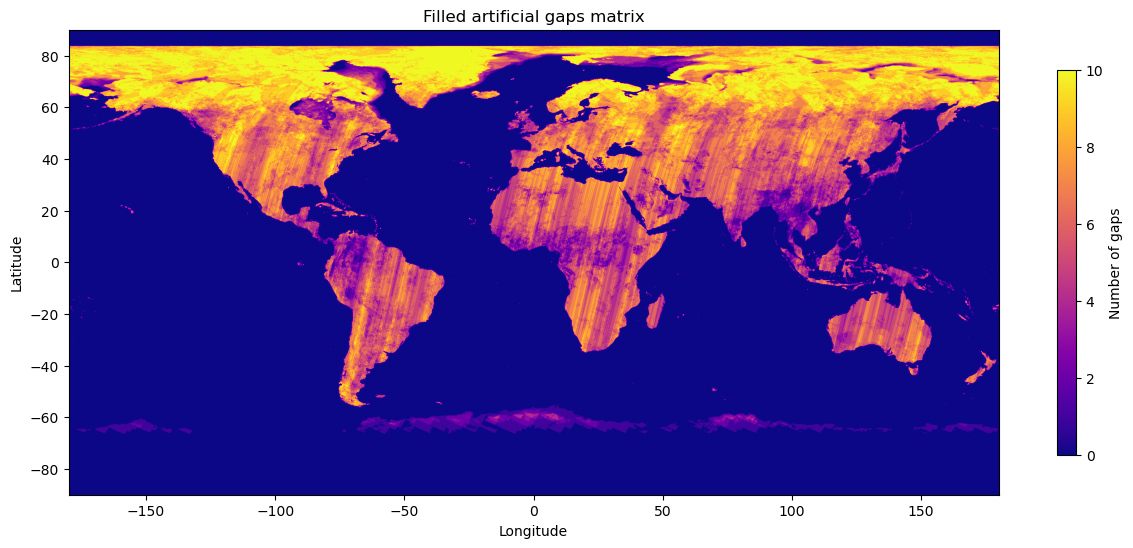

In [4]:
gap_count = get_gap_heat_map(ds)
dataset   = gap_count.to_dataset(name=variable)

plot_slice(
    ds          = dataset,
    var_to_plot = variable,  # replace with your actual variable to plot
    color_map   = 'plasma',
    title       = 'Filled artificial gaps matrix',
    label       = 'Number of gaps',
    xdim        = 'lon',
    ydim        = 'lat'
)